## Dataset References-
### https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    customer_info_df = pd.read_csv("dataset/customers.csv")
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Dataset could not be loaded. Is the dataset missing?


In [4]:
customer_info_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [87]:
# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [1])], 
                                      remainder='passthrough') 
  
customer_info_df = np.array(columnTransformer.fit_transform(customer_info_df), dtype = np.str) 


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
# Display a description of the dataset
display(customer_info_df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
customer_info_df.isnull().sum(axis=0)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

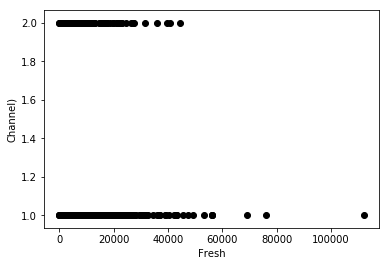

In [7]:
import matplotlib.pyplot as plt
X = customer_info_df[["Channel","Fresh"]]
#Visualise data points
plt.scatter(X["Fresh"],X["Channel"],c='black')
plt.xlabel('Fresh')
plt.ylabel('Channel)')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
clusters = [9,6,2,3,4,2]
list = []
for i in clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KModes(n_clusters=i, init='Huang', n_init=50, verbose=1)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(customer_info_df)

    # TODO: Find the cluster centers
    #centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(customer_info_df)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    
    score = silhouette_score(customer_info_df,preds)
    ss= "Silhouette score for {} clusters:  {}".format(i,score)
    list.append(ss)
    print("Silhouette score for {} clusters:  {}".format(i,score)) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 49, cost: 2616.0
Run 1, iteration: 2/100, moves: 0, cost: 2616.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 2635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 2695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2713.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 15, cost: 2679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 50, cost: 2589.0
Run 7, iteration: 2/100, moves: 0, cost: 2589.0
Init:

Run 8, iteration: 1/100, moves: 19, cost: 2625.0
Run 8, iteration: 2/100, moves: 0, cost: 2625.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 9, iteration: 1/100, moves: 27, cost: 2634.0
Run 9, iteration: 2/100, moves: 1, cost: 2634.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/100, moves: 0, cost: 2742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 11, iteration: 1/100, moves: 4, cost: 2681.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 12, iteration: 1/100, moves: 1, cost: 2638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 13, iteration: 1/100, moves: 27, cost: 2623.0
Run 13, iteration: 2/100, moves: 0, cost: 2623.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 14, iteration: 1/100, moves: 0, cost: 2656.0
Init: initializing centroids
In

Run 15, iteration: 1/100, moves: 0, cost: 2886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 16, iteration: 1/100, moves: 0, cost: 2886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 17, iteration: 1/100, moves: 0, cost: 2886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 18, iteration: 1/100, moves: 2, cost: 2804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 19, iteration: 1/100, moves: 0, cost: 2805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 20, iteration: 1/100, moves: 1, cost: 2741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 21, iteration: 1/100, moves: 0, cost: 2836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 22, iteration: 1/100, moves: 0, cost: 2885.0
Init: initializing centroids
Init: initializing 

Run 28, iteration: 1/100, moves: 0, cost: 2877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 29, iteration: 1/100, moves: 1, cost: 2672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 30, iteration: 1/100, moves: 0, cost: 2735.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 31, iteration: 1/100, moves: 1, cost: 2735.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 32, iteration: 1/100, moves: 19, cost: 2736.0
Run 32, iteration: 2/100, moves: 0, cost: 2736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 33, iteration: 1/100, moves: 58, cost: 2674.0
Run 33, iteration: 2/100, moves: 0, cost: 2674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 34, iteration: 1/100, moves: 0, cost: 2736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations.

Starting iterations...
Run 37, iteration: 1/100, moves: 1, cost: 2666.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 38, iteration: 1/100, moves: 3, cost: 2868.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 39, iteration: 1/100, moves: 2, cost: 2666.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 40, iteration: 1/100, moves: 43, cost: 2665.0
Run 40, iteration: 2/100, moves: 0, cost: 2665.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 41, iteration: 1/100, moves: 1, cost: 2729.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 42, iteration: 1/100, moves: 2, cost: 2697.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 43, iteration: 1/100, moves: 75, cost: 2667.0
Run 43, iteration: 2/100, moves: 1, cost: 2667.0
Init: initializing centroids
Init: initializing cluste

Run 48, iteration: 1/100, moves: 24, cost: 2830.0
Run 48, iteration: 2/100, moves: 21, cost: 2830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 49, iteration: 1/100, moves: 0, cost: 2805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 50, iteration: 1/100, moves: 19, cost: 2742.0
Run 50, iteration: 2/100, moves: 0, cost: 2742.0
Best run was number 4
Silhouette score for 2 clusters:  0.23771232784508964


In [21]:
kmodes = KModes(n_clusters=2, init='Huang', n_init=50, verbose=1)
cluster_kModes = kmodes.fit_predict(customer_info_array)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 2741.0
Run 1, iteration: 2/100, moves: 1, cost: 2741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 23, cost: 2746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 2804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 49, cost: 2747.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 2804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 2886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 2741.0
Init: initializing centroids
Init: initializing clust

In [22]:
cluster_kModes

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [23]:
import pickle
pickle.dump(clusterer,open("clustering_kmodes.pkl",'wb')) 

In [19]:
customer_info_array=customer_info_df.values

In [27]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [57]:
customer_info_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [58]:
customer_info_array

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]])

In [59]:
final_info_df = customer_info_df

In [62]:
final_info_df['KModes_clusters'] = clusters

In [77]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(customer_info_array)
# assign a cluster to each example
affinityPropagation_clusters = model.predict(customer_info_array)
print(affinityPropagation_clusters)
final_info_df['AffinityPropagation_clusters'] = affinityPropagation_clusters

[33 31 33 28 34 33 20 33 33 25 18 20  0  0  0 13 18 13 34 33 34 23 32  1
  0 34 13 20  2 30 34 23 19 32 23 18 22 12 25 24 32 34 12 15 33  2 25  3
 33  2 13 14 30 18 22 23 10 18 20 33 33  4 33 12 23  5 14  0 14 13 28  6
 21 32 33 19 14  7 13 23 13 18 33 19 20  8  9 30 26 22 13 28 10 11 31 14
 14 23 23 21 12 15 14 24 20 19 18 12 14 25 20 12 28 19 19 20 20 13 19 13
 19 23 20 33 30 24 28  0 14 30 21 23 20 13 13 13 31 14 20 13 34  0 30 21
 19  7 13 13 23 22 19 23 19 14 23 15 18 19 18 18 18 20 19  7 33 12 33 23
 13 23 18  2 14 15 23 18 30 20 20 23 33 16 18 17 23 13 23 31 33 31 28 20
 13 15 13 28 35 18 20 13 25 25  0 23 23 15 13 14 14 25 19 10 13 14 18 18
  7 19 18 23 19 18 21 23 13 20 34 23 23 21 21 14 22 23 19 14 13 19 13 30
 32 22 19 20 33 18 13 19 20 21 23 10 21  0 31 22 20 21 24 24 13 21 22 14
 18  2 15 19 12 19 23 23 14 30 23 23 22 26 21 34 23 20 24 32 24 30 13 28
 19 30 23 13 23 31 22 13 19 33 33 23 34 25 18 18 15 31 25 19 13  2 26 22
 15 21 20 31 13 14 20  2 23 13 19 34 22 27 23 23 28

In [78]:
from sklearn.cluster import KMeans
X = customer_info_array
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
kmeans_cluster = model.predict(customer_info_array)

print(kmeans_cluster)
final_info_df['Kmeans_cluster'] = kmeans_cluster

[0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 1 2 0 0 0 1 2 0 0 0 2 0 0 2
 0 1 2 2 0 0 1 0 1 1 1 0 1 0 0 2 0 2 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 2 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0
 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 2
 2 0 0 2 0 0 1 1 0 1 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 2 1 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 1 0
 1 0 2 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 2 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 0 2
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 0]


In [79]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=3)
model.fit(customer_info_array)
miniBatchKmeans_cluster = model.predict(customer_info_array)
print(miniBatchKmeans_cluster)
final_info_df['MiniBatchKmeans_cluster'] = miniBatchKmeans_cluster

[2 2 2 2 1 2 2 2 2 0 2 2 1 1 1 2 2 2 2 2 2 2 1 0 1 2 2 2 0 1 2 2 1 1 2 2 1
 2 0 1 1 2 2 0 2 0 0 0 2 0 2 2 1 2 1 2 0 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 1
 2 2 2 0 2 2 2 2 2 1 2 0 0 1 2 1 2 2 0 2 2 2 2 2 2 2 2 0 2 1 2 2 2 0 2 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 0 2 2
 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 2 2 1 2 2 2 2 1 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 0 1 2 2 0 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 0 2 1 2 1 2 2 1
 1 2 2 1 2 2 0 0 1 0 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 1 2 2 2 2 1 2
 2 2 2 2 2 0 2 2 0 2 0 2 2 0 2 1 0 2 2 2 2 2 2 0 2 2 2 2 1 1 2 2 2 2 2 0 1
 0 2 1 2 2 2 2 2 2 2 0 2 2 2 1 2 0 2 0 2 0 2 2 1 0 2 2 2 2 2 2 2 2 2 2 1 2
 1 1 2 2 2 2 2 1 2 2 1 2 1 2 0 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1
 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 1 0 2 2]


In [81]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3)
spectralClustering = model.fit_predict(customer_info_array)
print(spectralClustering)
final_info_df['spectralClustering'] = spectralClustering

[2 0 0 1 0 0 2 2 0 2 1 0 0 2 1 2 0 2 1 1 0 0 0 2 1 2 2 2 0 0 2 0 1 0 0 2 2
 1 2 1 2 0 2 2 1 0 2 2 1 0 0 2 1 1 0 0 2 0 0 0 0 2 0 0 2 2 2 1 0 0 2 1 2 2
 0 2 1 2 2 2 0 2 2 2 2 2 2 1 0 2 2 0 0 2 2 2 1 0 0 0 2 2 2 2 2 0 0 0 2 0 0
 2 1 2 1 2 2 1 0 1 2 0 1 1 2 0 0 1 2 0 0 0 0 0 0 2 2 0 0 0 2 2 1 1 2 2 2 1
 2 2 0 2 0 2 0 2 1 2 0 0 0 2 2 0 0 0 2 1 2 1 2 0 2 2 0 0 0 2 2 0 0 1 2 1 0
 1 2 2 0 2 1 1 0 0 2 2 2 0 2 0 0 1 0 2 0 0 1 1 2 2 0 2 2 0 2 2 0 0 0 2 2 0
 2 2 1 0 2 2 0 0 2 1 0 0 2 1 0 2 0 1 0 0 0 1 2 2 0 1 0 1 0 2 0 0 2 0 2 0 2
 1 0 0 2 0 1 0 0 1 0 2 0 2 0 2 2 0 0 2 0 0 0 0 2 2 2 0 0 0 0 2 2 0 0 1 2 0
 0 0 2 0 2 2 2 1 2 0 0 1 2 2 2 2 0 2 2 0 1 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2 2
 2 0 1 0 2 0 0 2 2 2 2 2 2 1 2 2 2 0 2 1 2 2 2 0 0 0 0 0 2 0 1 2 1 0 2 0 2
 0 1 0 2 0 0 0 0 0 0 1 0 2 2 1 0 2 0 0 2 0 1 0 2 2 0 1 0 0 2 2 1 2 0 2 0 2
 0 2 2 2 0 2 0 0 2 2 2 2 0 0 1 1 2 2 2 0 1 2 2 0 2 0 0 1 0 0 2 0 1]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [82]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
model.fit(customer_info_array)
GaussianMixture = model.predict(customer_info_array)
print(GaussianMixture)
final_info_df['GaussianMixture'] = GaussianMixture

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 2 1 0 1 2 2 2 2 2 1
 1 2 2 1 2 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 0 2 2
 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 1 2 1 0 1 2 1 2 0 1 0 1 2 1 2 2 0
 2 1 2 2 1 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 0 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 0 1 2 2 2 2 1 1 0 1 2 0 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 0 2 2 1 1 0 1 2 0 1 2 1 1 2 0 2 2 2 0 2 2 2 2 2 2 1 2 2]


In [83]:
final_info_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,clusters,AffinityPropagation_clusters,Kmeans_cluster,MiniBatchKmeans_cluster,MeanShift_cluster,spectralClustering,GaussianMixture
0,2,3,12669,9656,7561,214,2674,1338,2,33,0,2,0,2,1
1,2,3,7057,9810,9568,1762,3293,1776,2,31,0,2,0,0,1
2,2,3,6353,8808,7684,2405,3516,7844,2,33,0,2,0,0,1
3,1,3,13265,1196,4221,6404,507,1788,1,28,0,2,0,1,2
4,2,3,22615,5410,7198,3915,1777,5185,2,34,2,1,0,0,1


In [ ]:
#Lets analyze the clusters
#Add the column into our list
final_info_df[customer_info_df.columns].groupby(['clusters']).mean()